<a href="https://colab.research.google.com/github/shaniaking/Ultra-Rep/blob/main/Ultra_Rep_Baby_MVP_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Sales Engagement data
from google.colab import drive
drive.mount('/content/drive')

dataset1 = pd.read_csv('/content/drive/MyDrive/Ultra Rep Data Analysis/Synthetic Data/SalesEngagement.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200


Confusion Matrix:
[[142   0]
 [ 58   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


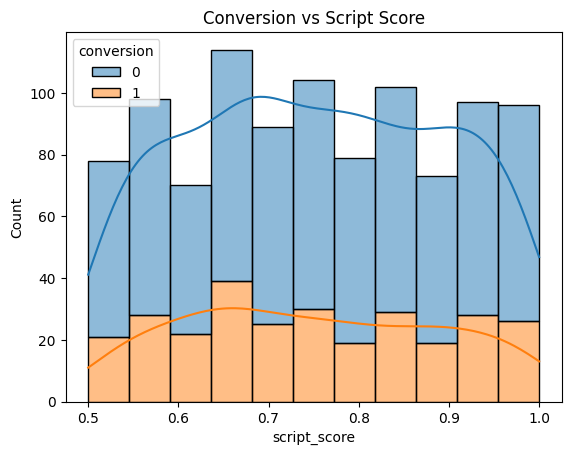

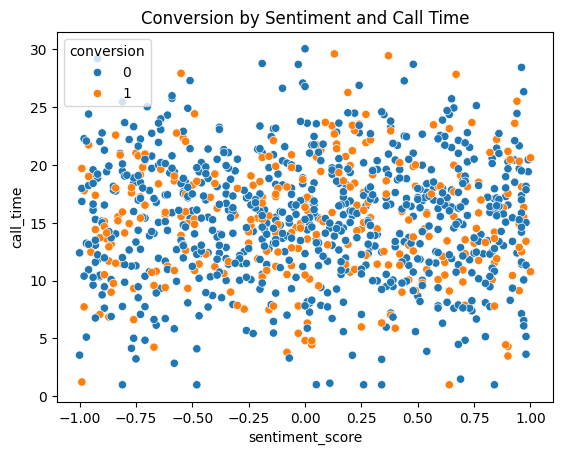

In [ ]:

#sentiment vs call time
sns.scatterplot(data=dataset1, x='sentiment_score', y='call_time', hue='conversion')
plt.title('Conversion by Sentiment and Call Time')
plt.show()
##Goal is to predict if a sales call will convery based on script performance and the sentiment score
X = dataset1.drop(['rep_id', 'lead_id', 'conversion'], axis=1)
y = dataset1['conversion']

#splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using classification because we want to know what is the best combo for tone, script quality, and duration
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#visualization
#script score vs conversion
sns.histplot(data=dataset1, x='script_score', hue='conversion', kde=True, multiple='stack')
plt.title('Conversion vs Script Score')
plt.show()


The "Conversion vs. Script Score" histplot represents the distribution of call lengths for converted and non converted leads.


*   This can help determine if shorter, longer, or even distributed calls are more successful
*   This can help determine the ideal call duration



The "Conversion by Sentiment and Call Time" scatterplot represents the relationship between call sentiment, script quality, and the conversion of the lead.


*   The orange dots represent success while the blue represents fail
*   This can help easily look for zones where conversions are most frequent



In [ ]:
#example of real-time coaching feedback based on a selected row (sales rep)
def give_feedback(row):
    if row['script_score'] < 0.5:
        return "Improve your script. Low score linked to lower conversions."
    elif row['call_time'] < 3:
        return "Try engaging the lead longer."
    elif row['sentiment_score'] < 0:
        return "Focus on building rapport. Negative sentiment detected."
    else:
        return "Nice job! Continue using this approach."

dataset1['coaching_tip'] = dataset1.apply(give_feedback, axis=1)
selected_row = dataset1.iloc[11]
print(give_feedback(selected_row))

Focus on building rapport—negative sentiment detected.


In [ ]:
#Outreach Data
from google.colab import drive
drive.mount('/content/drive')

dataset2 = pd.read_csv('/content/drive/MyDrive/Ultra Rep Data Analysis/Synthetic Data/Outreach.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



[Followups Dataset] Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       124
           1       0.00      0.00      0.00        76

    accuracy                           0.62       200
   macro avg       0.31      0.50      0.38       200
weighted avg       0.38      0.62      0.47       200


Confusion Matrix:
[[124   0]
 [ 76   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


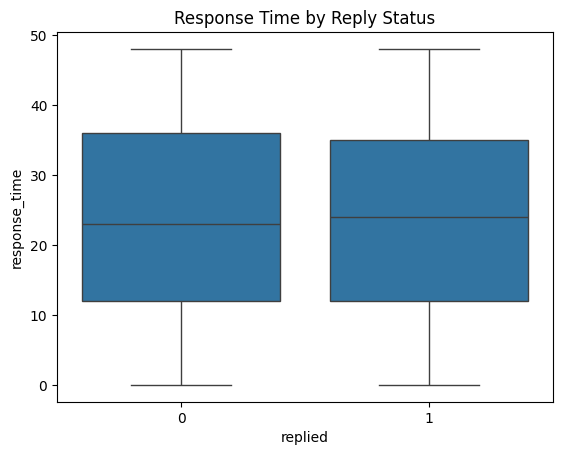

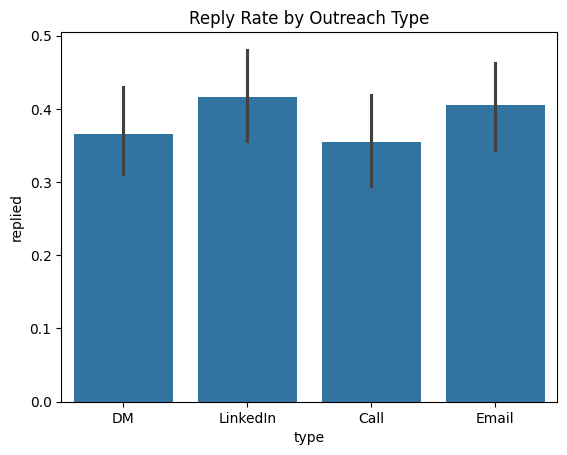

In [ ]:
##Goal is to predict whether a lead will reply based on outreach type, followups, and response time.
#preprocessing
dataset2_encoded = pd.get_dummies(dataset2, columns=['type'], drop_first=True)

#training and testing split
X2 = dataset2_encoded.drop(['lead_id', 'replied'], axis=1)
y2 = dataset2_encoded['replied']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#using classificiation because we want to figure out which type of outreach and behavior works best
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

#evaluation
print("\n[Followups Dataset] Classification Report:")
print(classification_report(y2_test, y2_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))

#visualization
sns.boxplot(data=dataset2, x='replied', y='response_time')
plt.title('Response Time by Reply Status')
plt.show()

sns.barplot(data=dataset2, x='type', y='replied')
plt.title('Reply Rate by Outreach Type')
plt.show()


The "Response Time by Reply Status" boxplot shows how response time differs between those who replied and those who did not.


*   The middle line represents the median response time
*   Helps to determine if faster or shorter response times are more likely correlated with better engagement.



The "Reply Rate by Outreach Type" barplot shows the average reoly rate for each outreach type.


*   Taller Bars = Higher reply rates
*   Helps to determine which outreach types are the most effective



In [ ]:
#example of recommending the best outreach type based on average reply rate of each
#computation
success_rates = dataset2.groupby('type')['replied'].mean().sort_values(ascending=False)
print("Success rates by outreach type:\n", success_rates)

#recommendation
def recommend_outreach():
    best_type = success_rates.idxmax()
    rate = success_rates.max()
    print(f"\nRecommended Outreach Method: {best_type.upper()} with {rate:.2%} success rate.")

recommend_outreach()


Success rates by outreach type:
 type
LinkedIn    0.416309
Email       0.404580
DM          0.366142
Call        0.354582
Name: replied, dtype: float64

Recommended Outreach Method: LINKEDIN with 41.63% success rate.


In [ ]:
#Rep Performance
from google.colab import drive
drive.mount('/content/drive')

dataset3 = pd.read_csv('/content/drive/MyDrive/Ultra Rep Data Analysis/Synthetic Data/RepPerformance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Rep Performance Regression Model:
Mean Squared Error: 10.367132512564115
R² Score: 0.06833228375069733

Feature Influence on Feedback Score:
           Feature  Coefficient
0   coaching_score     1.228489
1      avg_closing    -0.012845
2     onboard_time     0.049802
3  tasks_completed    -0.000303


<ipython-input-39-0a17fbe0c3b9>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='mako')


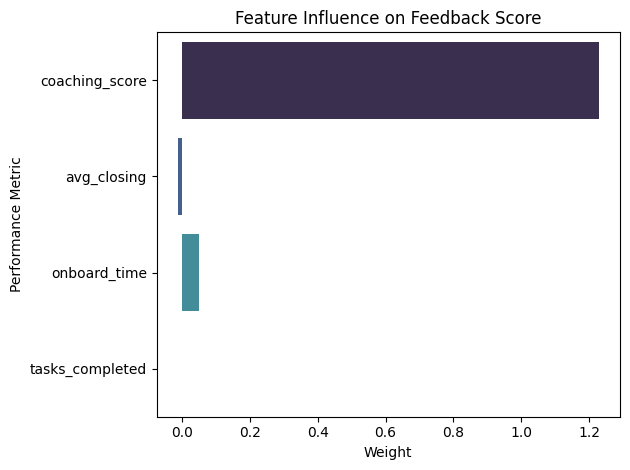

In [ ]:
##Goal is to predict a rep's feedback score based on performance metrics
#define features and target
features = ['coaching_score', 'avg_closing', 'onboard_time', 'tasks_completed']
target = 'feedback_score'

X = dataset3[features]
y = dataset3[target]

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using regression model because we are trying to estimate the feedback score based on performance
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#prediction
y_pred = regressor.predict(X_test)

#evaluation
print("\nRep Performance Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

#coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': regressor.coef_
})
print("\nFeature Influence on Feedback Score:")
print(coef_df)

#visualization
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='mako')
plt.title("Feature Influence on Feedback Score")
plt.xlabel("Weight")
plt.ylabel("Performance Metric")
plt.tight_layout()
plt.show()


The "Feature Influence on Feedback Score" barplot represents how much a specific feature influences the feedback score.


*   A longer bar = stronger influence on feedback score
*   If a bar is pointing towards the right, that indicates a positive influence



The MSE or Mean Squared Error measures the average squared differenced between predicted and actual values.


*   A lower MSE is better
* Since the feedback score is 1-20, the range is 19 which means that the MSE is not great but could be better (will improve later)

The R squared indicates how much variance in the target is explained by the model


*   1.0 is perfect while 0.0 is nothing
*   <0.0 is worse



